Enter Keyword/Tag to search about: Vaccination
Enter how many tweets to search: 10




============================Detail======================================
Name  =  Madhu Reddy 2277
Screen Name  =  2277Madhu
tweet  =  RT @NSUIOdisha: On the occasion of the celebration of  Honourable @RahulGandhi ji's birthday, NSUI Odisha team arranged Free Vaccination Ca…
Created At  =  2021-06-19 12:46:09
Location  =  
Sentiment  =  Positive



============================Detail======================================
Name  =  Akshaya Kumar Jena
Screen Name  =  Akshaya16625856
tweet  =  RT @achyuta_samanta: Commend the initiative of @bmcbbsr for organizing vaccination camp for delivery executives of aggregators at 7th Batta…
Created At  =  2021-06-19 12:46:09
Location  =  
Sentiment  =  Neutral



============================Detail======================================
Name  =  ᴹˢ ᴺᵒˣᵒˡᵒ
Screen Name  =  Lydiebug_xo
tweet  =  RT @Newzroom405: [BREAKING NEWS] Vaccination programme for teachers will s

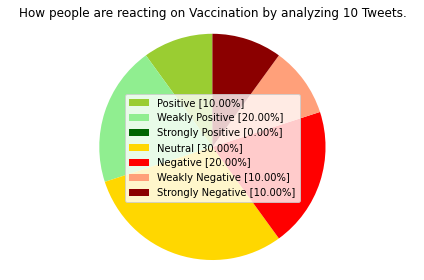

In [2]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt
from termcolor import colored
import colorama


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        consumerKey = '' # Enter your consumer key
        consumerSecret = '' # Enter your consumer Secret
        accessToken = '' # Enter your access Token
        accessTokenSecret = '' # Enter your access Token Secret
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth,wait_on_rate_limit=True)

        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0

        colorama.init()
        print('\n'*3)
        for tweet in self.tweets:
            print('============================Detail======================================')
            print(f'Name  =  {tweet.user.name}')
            print(f'Screen Name  =  {tweet.user.screen_name}')
            print(colored(f'tweet  =  {tweet.text}' ,color="magenta", on_color="on_cyan", attrs=["blink"]))
            print(f'Created At  =  {tweet.created_at}')
            print(f'Location  =  {tweet.user.location}')
            

            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            analysis = TextBlob(tweet.text)
            polarity += analysis.sentiment.polarity  

            if (analysis.sentiment.polarity == 0): 
                neutral += 1
                print(colored('Sentiment  =  Neutral', color="magenta", on_color="on_cyan", attrs=["blink"]))
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
                print(colored('Sentiment  =  Weakly Positive', color="magenta", on_color="on_cyan", attrs=["blink"]))
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
                print(colored('Sentiment  =  Positive', color="magenta", on_color="on_cyan", attrs=["blink"]))
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
                print(colored('Sentiment  =  Strong Positive', color="magenta", on_color="on_cyan", attrs=["blink"]))
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
                print(colored('Sentiment  =  Weakly Negative', color="magenta", on_color="on_cyan", attrs=["blink"]))
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
                print(colored('Sentiment  =  Negative', color="magenta", on_color="on_cyan", attrs=["blink"]))
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1
                print(colored('Sentiment  =  Strongly Negative', color="magenta", on_color="on_cyan", attrs=["blink"]))
            print('\n'*2)    


        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        polarity = polarity / NoOfTerms

        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="center")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()